# Dark Matter and Stellar Mass functions -- The Role of Feedback in Galaxy Formation

Dark Matter has yet to be detected, but it plays a crucial role in theoretical models of structure formation. According to the current understanding of cosmological structure formation, gravity amplifies the primordial density fluctuations, allowing small over-densities to overcome cosmological expansion and collapse into dark matter halos. Gas flows into these halos, cools radiatively, and forms stars and galaxies. The efficiency with which matter is converted into stars in these haloes depends on a variety of baryonic processes like gas cooling, star and black hole formation and feedback. Over the past decade, significant efforts have been made to comprehend and model these various processes. In this exercise, we will compare the simulated halo mass function with the observed stellar mass function to empirically compute the star formation efficiency in dark matter haloes. The star formation efficiency derived from this data is a powerful tool that can help us perfect our models of structure formation. 

We will focus on a crucial parameter called the Mass Function, which helps us understand how galaxies and dark matter haloes are distributed throughout the universe. The Mass Function is essentially a histogram that shows the mass distribution of galaxies/halos per unit volume.
$$
    \tilde{\phi}(dM) = \frac{1}{V}\frac{dN}{dM} \ \ \ \ (1).
$$
It is often expressed in terms of the log of the mass due to the vast range of masses encountered in the universe. By using the logarithmic scale, we can easily capture the significant differences in mass between objects while still keeping the expression manageable.
$$
    \phi(d \ log M) = \frac{1}{V} \frac{dN}{d \ log M} \ \ \ \ (2).
$$

## Part I:

Let's start by generating a plot of the halo mass function as predicted by the Thesan simulations (<a href="https://ui.adsabs.harvard.edu/abs/2022MNRAS.511.4005K/abstract">Kannan et al. 2022</a>). This prediction is based on the assumption that the $\Lambda$CDM  cosmolgical model is correct and gravity dictates the large-scale distribution of matter in the universe. To create the plot, we will extract the masses of all the haloes from the simulation's HDF5 format output file (Thesan-Dark-HMF.hdf5). Plot the mass function ($\phi_\rm{halo}$, using Eq. 2) on the y-axis (in units of Mpc$^{-3}$ dex$^{-1}$) as a function of the logarithm of the halo mass (M$_\rm{halo}$, in units of log(M$_\odot$)) on the x-axis. [Hint: The units of the halo mass and boxsize of the simulation are outlined as header attributes. Include legends and labels in all your plots and plot the y-axis on a log scale.]

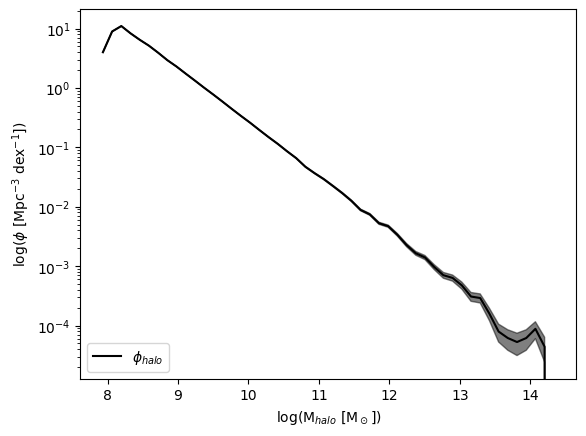

In [50]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from  scipy.interpolate import interp1d as interp

fname = "Thesan-Dark-HMF.hdf5"
f = h5py.File(fname, 'r')
mass = np.array(f["HaloMass"])                                                                                                  
boxsize = f['Header'].attrs['BoxSize']
f.close()

hist, xe = np.histogram(mass, range=(np.min(mass), np.max(mass)), bins=50)

log_halomass=[]
phi_halo=[]
phi_halo_err=[]
for i in range(len(xe)-1):
    log_halomass.append(0.5*(xe[i] + xe[i+1]))
    kk = np.where((mass>xe[i]) & (mass<xe[i+1]))
    phi_halo.append(len(mass[kk])/(boxsize*boxsize*boxsize)/(xe[i+1] - xe[i]))
    phi_halo_err.append(np.sqrt(len(mass[kk]))/(boxsize*boxsize*boxsize)/(xe[i+1] - xe[i]))

log_halomass = np.array(log_halomass)
phi_halo = np.array(phi_halo)
phi_halo_err = np.array(phi_halo_err)
plt.semilogy(log_halomass, phi_halo, 'k-', label=r'$\phi_{halo}$')
plt.fill_between(log_halomass, phi_halo-phi_halo_err, phi_halo+phi_halo_err, color='k', alpha=0.5)
plt.xlabel(r'log(M$_{halo}$ [M$_\odot$])')
plt.ylabel(r'log($\phi$ [Mpc$^{-3}$ dex$^{-1}$])')
plt.legend(loc=3)

## Part II:

Let's assume that all the baryons in the universe are converted to stars. What would be the expected stellar mass function ($\phi_{\star, \, \rm{exp}}$) in such a scenario? Use the cosmic baryon and matter density values derived from Planck satellite observations of the cosmic microwave backgroud ($\Omega_b=0.0486; \ \Omega_m = 0.3089$). [Hint: In order to make an accurate comparison, please replot the halo mass function (from Part I) and use the same units for the axes as in the previous plot.]

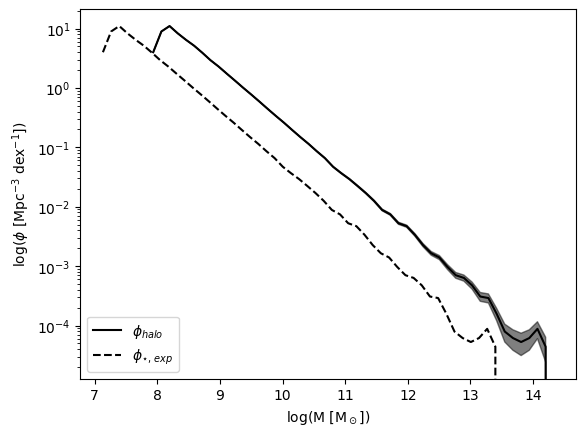

In [51]:
plt.semilogy(log_halomass, phi_halo, 'k-', label=r'$\phi_{halo}$')
plt.fill_between(log_halomass, phi_halo-phi_halo_err, phi_halo+phi_halo_err, color='k', alpha=0.5)

#### Expected mass function if all baryons are converetd to stars
smass = mass + np.log10(0.0486/0.3089)

hist, xe = np.histogram(smass, range=(np.min(smass), np.max(smass)), bins=50)

log_expected_stellarmass=[]
phi_expected_stellar=[]
for i in range(len(xe)-1):
    log_expected_stellarmass.append(0.5*(xe[i] + xe[i+1]))
    kk = np.where((smass>xe[i]) & (smass<xe[i+1]))
    phi_expected_stellar.append(len(smass[kk])/(boxsize*boxsize*boxsize)/(xe[i+1] - xe[i]))

plt.semilogy(log_expected_stellarmass, phi_expected_stellar, 'k--', label=r'$\phi_{\star, \, exp}$')

plt.xlabel(r'log(M [M$_\odot$])')
plt.ylabel(r'log($\phi$ [Mpc$^{-3}$ dex$^{-1}$])')
plt.legend(loc=3)

## Part III:

We will now analyze how the observed stellar mass function ($\phi_{\star, \, \rm{obs}}$) compares to the predicted halo mass function from simulations. Read in (from the file -- GSMF_Baldry_2012.txt) and plot the stellar mass function from the Galaxies And Mass Assembly (GAMA) survey conducted using the 2.5 m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States (<a href="https://ui.adsabs.harvard.edu/abs/2012MNRAS.421..621B/abstract">Baldry et al. 2012</a>) as a function of the observed stellar mass (M$_{\star, \, \rm{obs}}$). Compare it to the halo mass ($\phi_\rm{halo}$) and expected stellar mass ($\phi_{\star, \, \rm{exp}}$) functions.

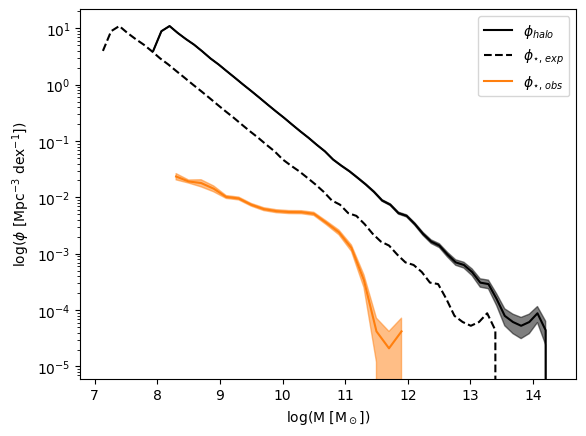

In [52]:
plt.semilogy(log_halomass, phi_halo, 'k-', label=r'$\phi_{halo}$')
plt.fill_between(log_halomass, phi_halo-phi_halo_err, phi_halo+phi_halo_err, color='k', alpha=0.5)

plt.semilogy(log_expected_stellarmass, phi_expected_stellar, 'k--', label=r'$\phi_{\star, \, exp}$')

###  Load in and plot the observed stellar mass function

log_stellarmass, temp, phi_observed_internal, phi_observed_err_internal, temp= np.loadtxt('GSMF_Baldry_2012.txt', unpack=True)
phi_observed = phi_observed_internal*1e-3
phi_observed_max = (phi_observed_internal+phi_observed_err_internal)*1e-3
phi_observed_min = (phi_observed_internal-phi_observed_err_internal)*1e-3
plt.semilogy(log_stellarmass, phi_observed, 'C1-', label=r'$\phi_{\star, \, obs}$')
plt.fill_between(log_stellarmass, phi_observed_max, phi_observed_min, color='C1', alpha=0.5)
plt.xlabel(r'log(M [M$_\odot$])')
plt.ylabel(r'log($\phi$ [Mpc$^{-3}$ dex$^{-1}$])')
plt.legend(loc=1)

## Part III

We can now begin to get a correspondence between the stellar and halo masses by making a very simple assumption, namely, more massive galaxies reside in more massive haloes. This will give a one-to-one correspondence between galaxies and halos. In this approximation, galaxies and haloes with the same number density ($\phi$) correspond to each other. Plot the efficiency with which baryons are converted to stars inside halos ($\epsilon$, on the y-axis) defined as the ratio between the observed stellar mass (from Baldry et al. 2012) and predicted halo mass (from Kannan et al. 2022) at the same number density (see Eq. 3) as a function of observed stellar mass (on the x-axis). Galaxies of what stellar mass are most efficient in converting baryons to stars? [Hint: You can use 1d interpolation to get an estimate of the observed stellar mass for all values of $\phi_\rm{halo}$.]
$$
    \epsilon = \frac{\rm{M}_{\star, \, \rm{obs}}}{\rm{M}_\rm{halo}} \, \rm{at \, the \, same \, value \, of \, } \phi = \phi_{\star, \, \rm{obs}} = \phi_\rm{halo}  \ \ \ \ (3).
$$

Text(0, 0.5, '$\\epsilon$')

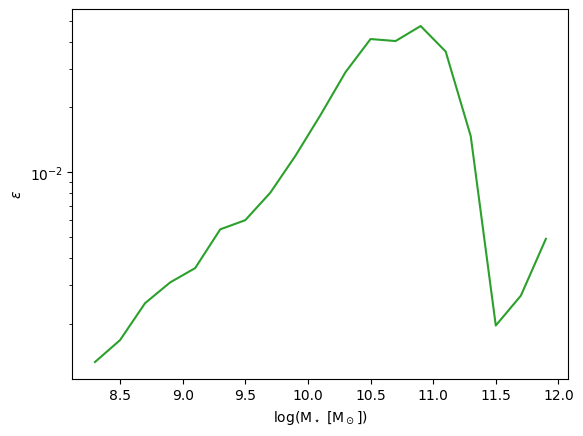

In [53]:
func = interp(phi_halo, log_halomass)
log_observed_stars = func(phi_observed)
plt.semilogy(log_stellarmass,10.0**log_stellarmass/10.0**log_observed_stars, 'C2-')
plt.xlabel(r'log(M$_\star$ [M$_\odot$])')
plt.ylabel(r'$\epsilon$')

## Part IV

The stellar mass of the Milky Way galaxy is observed to be around $5 \times 10^{10} \ \rm{M}_\odot$, what is the total halo mass of the MW?

In [54]:
log_MW_mass = np.log10(5e10)
func = interp(log_stellarmass, phi_observed)
phi_MW = func(log_MW_mass)

func = interp(phi_halo, log_halomass)
Halo_MW = func(phi_MW)
print ("Halo mass of MW = ", 10.0**Halo_MW)



Halo mass of MW =  1242187783557.2007
